In [37]:
conda install -c conda-forge scikit-plot

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniforge/base/envs/cv

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fonttools-4.34.4           |   py38he5c2ac2_0         1.6 MB  conda-forge
    kiwisolver-1.4.4           |   py38haa2428a_0          62 KB  conda-forge
    matplotlib-base-3.5.2      |   py38hd7f6e49_0         7.3 MB  conda-forge
    pyparsing-3.0.9            |     pyhd8ed1ab_0          79 KB  conda-forge
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.1 MB

T

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import scikitplot as skplt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB6, ResNet50V2

# load data

In [5]:
ImageSize = (224, 224)

Train_x = []
Train_y = []
for FileName in os.listdir('TRAIN/Benign/'):
    Train_x.append(PIL.Image.open('TRAIN/Benign/' + FileName).resize(ImageSize))
    Train_y.append(0)
    
for FileName in os.listdir('TRAIN/Cancer/'):
    Train_x.append(PIL.Image.open('TRAIN/cancer/' + FileName).resize(ImageSize))
    Train_y.append(1)
    
for FileName in os.listdir('TRAIN/CancerENE/'):
    Train_x.append(PIL.Image.open('TRAIN/cancerENE/' + FileName).resize(ImageSize))
    Train_y.append(2)
    
# List로 모든 이미지 읽은 후, numpy array로 수정
Test_x = []
Test_y = []
for FileName in os.listdir('Test/Benign/'):
    Test_x.append(PIL.Image.open('Test/Benign/' + FileName).resize(ImageSize))
    Test_y.append(0)
    
for FileName in os.listdir('Test/Cancer/'):
    Test_x.append(PIL.Image.open('Test/Cancer/' + FileName).resize(ImageSize))
    Test_y.append(1)
for FileName in os.listdir('Test/CancerENE/'):
    Test_x.append(PIL.Image.open('Test/CancerENE/' + FileName).resize(ImageSize))
    Test_y.append(2)

In [6]:
Train_x = np.stack(Train_x, axis=0 )
Train_y = np.array(Train_y)

Test_x = np.stack(Test_x, axis=0 )
Test_y = np.array(Test_y)

# model load

In [19]:
VGGModel = tf.keras.applications.EfficientNetB0(include_top=False,
    weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None)

x = GlobalAveragePooling2D()(VGGModel.output)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=VGGModel.input, outputs=predictions)

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['normalization[0][0]']    

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

# fine tunning

In [21]:
# batch_size: 한번에 forward & Backword 하는 샘플의 수
batch_size = 32

# Training 수
epochs = 50

# Weight 조절 parameter
LearningRate = 1e-3 # 0.001
Decay = 1e-6

img_width = 224
img_height = 224

In [40]:
# 디렉토리 경로 설정 필요
CurrentDirectory = "./"

train_directory = CurrentDirectory + 'TRAIN/'
test_directory  = CurrentDirectory + 'TEST/'
model_directory = CurrentDirectory + 'MODEL/'
tensorboard_directory = CurrentDirectory + 'Tensorboard'

In [41]:
DATAGEN_TRAIN = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last",
    validation_split=0.10) # Train / Validation

In [42]:
TRAIN_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    classes=["Benign", "Cancer","CancerENE"],
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical", # category 일 경우 -> Final layer: unit2 softmax
    subset = "training")

VALID_GENERATOR = DATAGEN_TRAIN.flow_from_directory(
    train_directory,
    classes=["Benign", "Cancer","CancerENE"],
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode= "categorical",
    subset = "validation")

Found 953 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [43]:
DATAGEN_TEST = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    data_format="channels_last")

In [44]:
TEST_GENERATOR = DATAGEN_TEST.flow_from_directory(
    test_directory,
    classes=["Benign", "Cancer","CancerENE"],
    target_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    class_mode='categorical')

Found 118 images belonging to 3 classes.


In [45]:
Image, Label = TEST_GENERATOR.__getitem__(0)

/opt/homebrew/Caskroom/miniforge/base/envs/cv/lib/python3.8/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/homebrew/Caskroom/miniforge/base/envs/cv/lib/python3.8/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


# call backs

In [46]:
# Callbacks
# Checkpoint
checkpoint_cb = ModelCheckpoint('my_best_model.h5', save_best_only=True) 
# EarlyStopping
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
# TensorBoard
tensorboard_cb = TensorBoard(log_dir=tensorboard_directory, write_graph=True, write_images=True)
# ReduceLearning rate
reduceLR_cb = ReduceLROnPlateau(monitor='val_loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb,tensorboard_cb,reduceLR_cb])

# model compile & fit

In [48]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [53]:
VGGModel = tf.keras.applications.VGG16(include_top=False,
    weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None)

x = GlobalAveragePooling2D()(VGGModel.output)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=VGGModel.input, outputs=predictions)

In [54]:
model.compile(optimizer='Adam',
         loss='categorical_crossentropy',
         metrics=['accuracy']
) 

In [55]:
history = model.fit_generator(
    TRAIN_GENERATOR,
    epochs=20,
    callbacks=[checkpoint_cb, early_stopping_cb,tensorboard_cb,reduceLR_cb],
    shuffle=True,
    validation_data=VALID_GENERATOR)

/var/folders/fb/fgwpc_kd3dxdcfsnm_9w3wv40000gn/T/ipykernel_55088/2700177093.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
/opt/homebrew/Caskroom/miniforge/base/envs/cv/lib/python3.8/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/homebrew/Caskroom/miniforge/base/envs/cv/lib/python3.8/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20


2022-07-18 10:53:10.071665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 1.6996 - accuracy: 0.5047

2022-07-18 10:54:25.329736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 78s 3s/step - loss: 1.6996 - accuracy: 0.5047 - val_loss: 0.9624 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 76s 3s/step - loss: 0.9809 - accuracy: 0.5666 - val_loss: 0.9669 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 78s 3s/step - loss: 0.9724 - accuracy: 0.5666 - val_loss: 0.9639 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 0.9742 - accuracy: 0.5666
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
30/30 [==============================] - 76s 3s/step - loss: 0.9742 - accuracy: 0.5666 - val_loss: 0.9645 - val_accuracy: 0.5714 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 76s 3s/step - loss: 0.9715 - accuracy: 0.5666 - val_loss: 0.9675 - val_accuracy: 0.5714 - lr: 8.0000e-04
Epoch 6/20
30/30 [==============================] - 75s 2s/step - loss: 0.9706 - acc

In [56]:
Res = model.predict(TEST_GENERATOR)

2022-07-18 11:33:50.165757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 737ms/step


/opt/homebrew/Caskroom/miniforge/base/envs/cv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

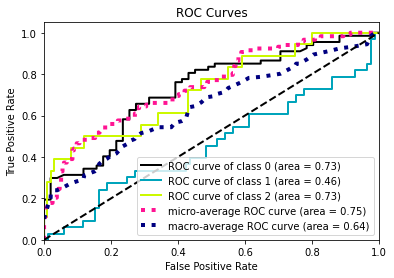

In [57]:
skplt.metrics.plot_roc_curve(TEST_GENERATOR.classes, Res)